In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('vdjdb.txt', sep="	")

## Sequence Embedding and Preprocessing

In [2]:
def generate_kmers(sequence, k):
    """Generate k-mers for a given sequence."""
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

In [3]:
# convert all unique amino acid sequences into k-mers to create model training sentences
kmer_sentences=[]
for seq in df.cdr3.unique():
    kmer=generate_kmers(seq, 3)
    kmer_sentences.append(kmer)

In [4]:
# convert all the amino acid sequences in dataset
cdr3_kmer_list=[]
for sequences in df.cdr3:
    kmers=generate_kmers(sequences, 3)
    cdr3_kmer_list.append(kmers)

In [5]:
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences=kmer_sentences, vector_size=100, window=5, min_count=1, workers=1, seed=1729)

# Aggregate K-mer embeddings for each amino acid sequence
word2vec_embeddings_list = []
for seq in cdr3_kmer_list:
    kmer_embeddings = [word2vec_model.wv[kmer] for kmer in seq]
    sequence_embedding = np.sum(kmer_embeddings, axis=0)  # sum embeddings of K-mers
    word2vec_embeddings_list.append(sequence_embedding)
word2vec_embeddings_list = np.array(word2vec_embeddings_list)
print(word2vec_embeddings_list.shape)

(92771, 100)


In [6]:
df['cdr_embedding'] = [row for row in word2vec_embeddings_list] 
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,cdr_embedding
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no,"[-8.431278, 1.5789485, 3.5312345, 6.447777, -1..."
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no,"[-2.3255663, -1.7809021, 3.6051016, -1.3224487..."
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,"[-4.412357, -4.962873, 3.910462, 0.916214, -0...."
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no,"[-0.52044535, 5.97092, -17.000359, -1.97581, -..."
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,"[-3.6310835, -4.477768, 4.2031326, -2.6053581,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no,"[2.9010594, 1.743782, 2.2151518, -7.8205457, 4..."
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no,"[26.40483, 14.296065, -1.6711563, 2.9349594, 1..."
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no,"[-3.6181068, -0.7041099, 2.858562, -5.6365194,..."
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no,"[23.947598, 7.98563, -15.153706, 8.466385, 3.5..."


In [7]:
df_alpha = df[df['gene'] == 'TRA']
df_beta = df[df['gene'] == 'TRB']

In [8]:
#filtered_alpha = df_alpha[df_alpha['vdjdb.score'] > 0]
#filtered_beta = df_beta[df_beta['vdjdb.score'] > 0]

In [9]:
filtered_alpha = df_alpha.drop_duplicates(subset=['cdr3', 'antigen.epitope'])
filtered_beta = df_beta.drop_duplicates(subset=['cdr3', 'antigen.epitope'])

In [10]:
filtered_beta['antigen.epitope'].value_counts()

antigen.epitope
KLGGALQAK     12667
NLVPMVATV      4697
GILGFVFTL      3501
AVFDRKSDAK     1648
ELAGIGILTV     1422
              ...  
LSDLQDLKW         1
PTDQSYYIV         1
CTDDNALAY         1
TLATHGLAAV        1
DRLNQLESK         1
Name: count, Length: 1168, dtype: int64

In [11]:
target_antigen_series = filtered_beta['antigen.epitope'].value_counts()[filtered_beta['antigen.epitope'].value_counts() >= filtered_beta.shape[0]*0.01]
target_antigen_series

antigen.epitope
KLGGALQAK     12667
NLVPMVATV      4697
GILGFVFTL      3501
AVFDRKSDAK     1648
ELAGIGILTV     1422
GLCTLVAML      1044
YLQPRTFLL       903
RAKFKQLL        853
IVTDFSVIK       551
SPRWYFYYL       543
CTPYDINQM       530
TTPESANL        523
KRWIILGLNK      469
Name: count, dtype: int64

In [12]:
target_antigens = target_antigen_series.index

In [13]:
beta = filtered_beta[filtered_beta['antigen.epitope'].isin(target_antigens)]
beta

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,cdr_embedding
398,0,TRB,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPQTGTGGYGYTF"", ""cdr3_old"": ""CASS...",0,other,sanger,no,yes,"[10.554716, 2.137897, -2.6828737, -7.9884233, ..."
400,0,TRB,CASSPLFGTSGGETYYF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPLFGTSGGETYYF"", ""cdr3_old"": ""CAS...",0,other,sanger,no,yes,"[7.0231853, 2.8141677, -1.3262365, -6.760373, ..."
402,0,TRB,CASSPQTGASYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPQTGASYGYTF"", ""cdr3_old"": ""CASSP...",0,other,sanger,no,yes,"[8.405084, 6.243805, -0.37335086, -13.4075775,..."
403,0,TRB,CASSLVGGRYGYTF,TRBV12-3*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSLVGGRYGYTF"", ""cdr3_old"": ""CASSLV...",0,other,sanger,no,yes,"[0.17031372, -2.9321764, -2.6851025, -3.910436..."
405,0,TRB,CASSPATGTIYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPATGTIYGYTF"", ""cdr3_old"": ""CASSP...",0,other,sanger,no,yes,"[6.962004, 4.5962353, -2.1018348, -6.161187, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92270,30508,TRB,CATQDMNTGELFF,TRBV6-1*01,TRBJ2-2*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,YLQPRTFLL,...,PMID:35750048,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CATQDMNTGELFF"", ""cdr3_old"": ""CATQDMN...",0,sort,singlecell,no,no,"[5.6908574, 5.5936985, -0.20950861, 3.2038069,..."
92277,30511,TRB,CASLLKLRDTSYEQYF,TRBV5-6*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,YLQPRTFLL,...,PMID:35750048,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASLLKLRDTSYEQYF"", ""cdr3_old"": ""CASL...",0,sort,singlecell,no,no,"[-11.608751, 2.7730887, 2.7789953, -5.4781504,..."
92280,0,TRB,CSVMDSLNTGELFF,TRBV29-1*01,TRBJ2-2*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,YLQPRTFLL,...,PMID:35750048,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSVMDSLNTGELFF"", ""cdr3_old"": ""CSVMDS...",0,sort,singlecell,no,no,"[3.4163103, 0.96685153, 2.7180161, -0.10254866..."
92288,0,TRB,CASQQGNTGELFF,TRBV19*01,TRBJ2-2*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,YLQPRTFLL,...,PMID:35750048,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASQQGNTGELFF"", ""cdr3_old"": ""CASQQGN...",0,sort,singlecell,no,no,"[9.3024025, 4.7460885, -1.8338946, 0.4264394, ..."


In [14]:
beta.cdr3.value_counts()

cdr3
CASSIRSSYEQYF        7
CASSLGVAGTNTGELFF    7
CASSVRSSMNTEAFF      6
CATSTGDSNQPQHF       6
CASSSTGGGEKDQPQHF    6
                    ..
CASSSTTGYTF          1
CASSSLTGTGYNEQFF     1
CASSLDVDSYNEQFF      1
CASSANLAGDYNEQFF     1
CASNPDRNTGELFF       1
Name: count, Length: 27765, dtype: int64

In [15]:
beta.cdr3.value_counts().index[0]

'CASSIRSSYEQYF'

### Here we observe the cross reactivity of amino acids

In [16]:
beta['antigen.epitope'][beta['cdr3']==beta.cdr3.value_counts().index[0]]

1578      GILGFVFTL
20885     GLCTLVAML
26799     IVTDFSVIK
27403    AVFDRKSDAK
31665    ELAGIGILTV
31905     KLGGALQAK
34951      RAKFKQLL
Name: antigen.epitope, dtype: object

In contrast with most machine learning tasks, where one attempts to predict the output for a given input (e.g. classifying an object), TCR binding is a pairing problem, where one is given a pair of inputs (a peptide and a TCR), and the goal is to predict whether they would bind.

We must test whether an unknown TCR binds to a predefined target, using TCRs known to bind to this target as training information. In other words, the target is fixed, and TCRs are divided into training and test sets. 

This will allow us to predict TCRs that will bind to each epitope. Evaluating these predictions should be done using the Area Under Curve (AUC).

## Categorical Feature Encoding

#### Multi-hot encoding and Dimensionality Reduction (Option 1)

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Extract categorical columns
cat_columns = ['v.segm','j.segm','mhc.a']
cat_data = beta[cat_columns]

# Step 2: One-Hot Encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(cat_data)

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cat_columns))
encoded_df

,v.segm_TRBV10-1*01,v.segm_TRBV10-2*01,v.segm_TRBV10-3*01,v.segm_TRBV11-1*01,v.segm_TRBV11-2*01,v.segm_TRBV11-3*01,v.segm_TRBV12-1*01,v.segm_TRBV12-2*01,v.segm_TRBV12-3*01,v.segm_TRBV12-4*01,...,mhc.a_HLA-A*03:01,mhc.a_HLA-A*11,mhc.a_HLA-A*11:01,mhc.a_HLA-B*07:02,mhc.a_HLA-B*08,mhc.a_HLA-B*08:01,mhc.a_HLA-B*27,mhc.a_HLA-B*27:05,mhc.a_HLA-B*27:05:31,mhc.a_Mamu-A*01
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.decomposition import TruncatedSVD


num_components = 50
svd = TruncatedSVD(n_components=num_components)
reduced_data = svd.fit_transform(encoded_data)

reduced_data

array([[ 0.103902  ,  0.12222929,  0.09460539, ..., -0.0195435 ,
        -0.00481043, -0.00913709],
       [ 0.103902  ,  0.12222929,  0.09460539, ..., -0.0195435 ,
        -0.00481043, -0.00913709],
       [ 0.103902  ,  0.12222929,  0.09460539, ..., -0.0195435 ,
        -0.00481043, -0.00913709],
       ...,
       [ 0.19428371,  0.22772632,  0.05832607, ..., -0.00902035,
         0.00080602, -0.00889342],
       [ 0.28581443,  0.36762628,  0.09724921, ..., -0.00393239,
         0.00754377, -0.00290042],
       [ 0.18132587,  0.22708284,  0.0545358 , ..., -0.01164492,
        -0.00141914, -0.01275521]])

#### Categorical Encoding and Pytorch Embedding Layers (Option 2)

In [19]:
cat_columns = ['v.segm','j.segm','mhc.a']
cat_data = beta[cat_columns]
cat_data

,v.segm,j.segm,mhc.a
398,TRBV6-5*01,NaN,HLA-A*02:01
400,TRBV6-5*01,NaN,HLA-A*02:01
402,TRBV6-5*01,NaN,HLA-A*02:01
403,TRBV12-3*01,NaN,HLA-A*02:01
405,TRBV6-5*01,NaN,HLA-A*02:01
...,...,...,...
92270,TRBV6-1*01,TRBJ2-2*01,HLA-A*02:01
92277,TRBV5-6*01,TRBJ2-7*01,HLA-A*02:01
92280,TRBV29-1*01,TRBJ2-2*01,HLA-A*02:01
92288,TRBV19*01,TRBJ2-2*01,HLA-A*02:01


In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
v_gene_encoder = LabelEncoder()
j_gene_encoder = LabelEncoder()
mhc_allele_encoder = LabelEncoder()

# Fit LabelEncoders and transform data
v_gene_indices = v_gene_encoder.fit_transform(cat_data['v.segm'])
j_gene_indices = j_gene_encoder.fit_transform(cat_data['j.segm'])
mhc_allele_indices = mhc_allele_encoder.fit_transform(cat_data['mhc.a'])

# Print encoded indices
print("Encoded V gene indices:", v_gene_indices)
print("Encoded J gene indices:", j_gene_indices)
print("Encoded MHC allele indices:", mhc_allele_indices)

Encoded V gene indices: [43 43 43 ... 27 16  8]
Encoded J gene indices: [14 14 14 ...  8  8  8]
Encoded MHC allele indices: [1 1 1 ... 1 1 1]


In [21]:
import torch
import torch.nn as nn

# Define a function to initialize embedding layers for categorical features
def initialize_embedding_layers(v_vocab_size, j_vocab_size, mhc_vocab_size, cat_embedding_dim):
    embedding_layers = {}
    v_embedding = nn.Embedding(v_vocab_size, cat_embedding_dim, padding_idx=0)
    j_embedding = nn.Embedding(j_vocab_size, cat_embedding_dim, padding_idx=0)
    mhc_embedding = nn.Embedding(mhc_vocab_size, cat_embedding_dim, padding_idx=0)
    embedding_layers['v_embedding'] = v_embedding
    embedding_layers['j_embedding'] = j_embedding
    embedding_layers['mhc_embedding'] = mhc_embedding
    return embedding_layers

# Define hyperparameters
hparams = {
    'v_vocab_size': len(v_gene_encoder.classes_),       # Size of V gene vocabulary
    'j_vocab_size': len(j_gene_encoder.classes_),        # Size of J gene vocabulary
    'mhc_vocab_size': len(mhc_allele_encoder.classes_),      # Size of MHC allele vocabulary
    'cat_embedding_dim': 15    # Embedding dimension for categorical features (Can be experimented with)
}

# Initialize embedding layers
embedding_layers = initialize_embedding_layers(hparams['v_vocab_size'], hparams['j_vocab_size'],
                                               hparams['mhc_vocab_size'], hparams['cat_embedding_dim'])

# Print the initialized embedding layers
print("Initialized Embedding Layers:")
for name, layer in embedding_layers.items():
    print(f"{name}: {layer}")


Initialized Embedding Layers:
v_embedding: Embedding(61, 15, padding_idx=0)
j_embedding: Embedding(15, 15, padding_idx=0)
mhc_embedding: Embedding(16, 15, padding_idx=0)


In [22]:
# Define a function to execute embeddings for a set of indices
def execute_embedding(embedding_layer, indices):
    return embedding_layer(torch.tensor(indices, dtype=torch.long))

# Execute embeddings for V and J genes and MHC Allele
embeddings_v = execute_embedding(embedding_layers['v_embedding'], v_gene_indices)
embeddings_j = execute_embedding(embedding_layers['j_embedding'], j_gene_indices)
embeddings_mhc = execute_embedding(embedding_layers['mhc_embedding'], mhc_allele_indices)

## Extracting Training and Test Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

beta_cdr_embedding = pd.DataFrame(beta.cdr_embedding.tolist())
beta_cdr_embedding = beta_cdr_embedding.to_numpy()

X = np.concatenate([beta_cdr_embedding, embeddings_v.detach().numpy(), embeddings_j.detach().numpy(), embeddings_mhc.detach().numpy()], axis=1)
#X = np.concatenate([beta_cdr_embedding, reduced_data], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)


y = beta['antigen.epitope']
beta_cdr3 = beta.cdr3

In [24]:
X.shape

(29351, 145)

In [25]:
# Create a DataFrame with features and labels
data = pd.DataFrame({'cdr3':beta_cdr3, 'labels': y})

# Identify unique data points based on features
unique_data = data.drop_duplicates(subset='cdr3')

# Stratified sampling to split unique data points into training and test sets
X_train_unique, X_test_unique, y_train_unique, y_test_unique = train_test_split(
    unique_data['cdr3'], unique_data['labels'], 
    test_size=0.2, stratify=unique_data['labels'], random_state=42)

In [26]:
# Ensure sequence exclusivity of data points between training and test sets
X_train_indices = data[data['cdr3'].isin(X_train_unique)].index
X_test_indices = data[data['cdr3'].isin(X_test_unique)].index

# Retrieve corresponding labels for the selected data points
y_train = y[X_train_indices]
y_test = y[X_test_indices]

# Extract feature vectors as NumPy arrays
X = pd.Series(X.tolist())
X.index = beta.index

X_train = X[X_train_indices]
X_test = X[X_test_indices]

X_train = np.array(X_train.to_list())
X_test = np.array(X_test.to_list())

print(X_train.shape)

(23478, 145)


In [27]:
y_train_label_encoder = LabelEncoder()
y_test_label_encoder = LabelEncoder()

y_train_labels = y_train_label_encoder.fit_transform(y_train)
y_test_labels = y_test_label_encoder.fit_transform(y_test)

## Visualisation

In [28]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, random_state=1729)

X_train_reduced = tsne.fit_transform(X_train)
X_test_reduced = tsne.fit_transform(X_test)

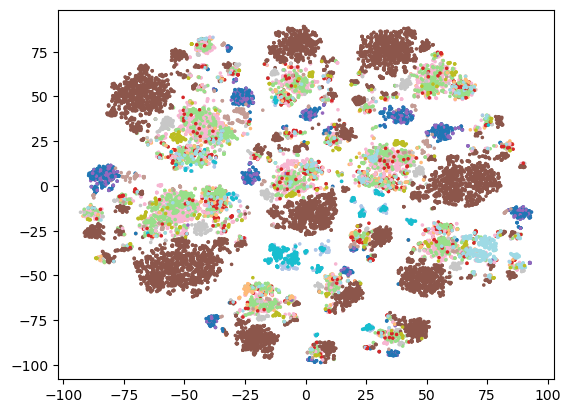

In [29]:
plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train_labels, cmap='tab20', marker='.', s=10)
plt.show()

## Multi-Label Classifier

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a separate binary classifier for each label
classifiers = []
for i in range(len(set(y))):
    # Create a binary label indicating whether the sample belongs to the current class
    y_binary = (y_train_labels == i).astype(int)
    
    # Train a binary classifier for the current label
    classifier = SVC(kernel='rbf', random_state=42)
    classifier.fit(X_train, y_binary)
    classifiers.append(classifier)

# Make predictions for each label
predictions = []
for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    predictions.append(y_pred)
predictions = np.array(predictions)

In [31]:
predictions.shape

(13, 5873)

In [57]:
# Initialize a dictionary to store indices of data points predicted for each class
predicted_indices = {i: [] for i in range(len(set(y)))}

# Iterate over the predictions and store the indices of data points predicted positively for each class
for label, y_pred in enumerate(predictions):
    for idx, pred in enumerate(y_pred):
        if pred == 1:  # Positive prediction for the current class
            predicted_indices[label].append(idx)

# Print the indices of data points predicted for each class
for label, indices in predicted_indices.items():
    print(f"Data points predicted for class {label}: {indices}")

Data points predicted for class 0: [1512, 1518, 1858, 1864, 1865, 1866, 1870, 1878, 1881, 1883, 1890, 1894, 1895, 1904, 1911, 1912, 1917, 1918, 1924, 1927, 1935, 1939, 1951, 1952, 1956, 1960, 1965, 1966, 1968, 1970, 1976, 1981, 1988, 1990, 1994, 2005, 2007, 2009, 2010, 2013, 2016, 2018, 2031, 2034, 2036, 2057, 2058, 2059, 2060, 2062, 2072, 2075, 2079, 2089, 2096, 2099, 2113, 2117, 2121, 2124, 2131, 2133, 2135, 2149, 2161, 2170, 2174, 2203, 2206, 2208, 2209, 2223, 2224, 2228, 2239, 2240, 2241, 2251, 2253, 2261, 2262, 2264, 2265, 2274, 2281, 2289, 2291, 2298, 2301, 2307, 2308, 2312, 2316, 2319, 2320, 2335, 2337, 2338, 2343, 2345, 2347, 2348, 2366, 2378, 2380, 2381, 2391, 2399, 2404, 2409, 2414, 2429, 2438, 2449, 2450, 2458, 2464, 2467, 2475, 2485, 2486, 2502, 2510, 2512, 2528, 2537, 2544, 2565, 2574, 2582, 2599, 2618, 2627, 2650, 2661, 2665, 2667, 2674, 2676, 2701, 2707, 2710, 2723, 2739, 2741, 2743, 2745, 2763, 2765, 2768, 2770, 2779, 2782, 2790, 2791, 2801, 2805, 2809, 2811, 2812, 2814

In [58]:
pd.Series(y_test_labels).value_counts()

6     2538
8      942
3      702
0      322
2      282
4      209
12     183
9      173
10     109
5      108
1      106
11     105
7       94
Name: count, dtype: int64

In [63]:
from sklearn.metrics import roc_auc_score

# Initialize a list to store AUC-ROC scores for each label
label_auc_roc_scores = []

# Iterate over the predictions and compute AUC-ROC score for each label
for label, y_pred in enumerate(predictions):
    auc_roc_score = roc_auc_score((y_test_labels == label).astype(int), y_pred)
    label_auc_roc_scores.append(auc_roc_score)
    print(f"AUC-ROC score for label {label}: {auc_roc_score}")

# Compute the overall AUC-ROC score (macro-average)
overall_auc_roc_score = sum(label_auc_roc_scores) / len(label_auc_roc_scores)
print(f"Overall AUC-ROC score (macro-average): {overall_auc_roc_score}")

AUC-ROC score for label 0: 0.9877068761601905
AUC-ROC score for label 1: 0.9082098537220556
AUC-ROC score for label 2: 0.5141843971631206
AUC-ROC score for label 3: 0.7273331823708927
AUC-ROC score for label 4: 0.5595437819317168
AUC-ROC score for label 5: 0.5
AUC-ROC score for label 6: 1.0
AUC-ROC score for label 7: 1.0
AUC-ROC score for label 8: 0.7989051457889577
AUC-ROC score for label 9: 0.9913294797687862
AUC-ROC score for label 10: 1.0
AUC-ROC score for label 11: 0.8656264447526584
AUC-ROC score for label 12: 0.758156866134624
Overall AUC-ROC score (macro-average): 0.8162304636763847


In [60]:
# Count the number of data points for which no class was predicted
no_prediction_count = sum(all(pred == 0 for pred in pred_set) for pred_set in zip(*predictions))

# Calculate the proportion of data points without a prediction
total_data_points = len(X_test)
proportion_no_prediction = no_prediction_count / total_data_points
print(f"Proportion of data points without a prediction: {proportion_no_prediction:.2f}")

Proportion of data points without a prediction: 0.14
